# Bu kod **36 veri** ile **Google Colab** üzerinden örnek olarak çalıştırılmıştır. Başarılı sorunçlar için veri sayısı, epoch, batch_size değerleri değiştirilmelidir.

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy
import random as r
import glob
import skimage.io as io
import matplotlib.pyplot as plt
import keras

In [ ]:
pip install simpleitk

     |████████████████████████████████| 47.4MB 64kB/s 


In [ ]:
!unzip /content/drive/MyDrive/Örnek_veri.zip
#!unzip /content/Örnek_veri.zip

Archive:  /content/drive/MyDrive/Örnek_veri.zip
   creating: data_training/
   creating: data_training/HGG/
   creating: data_training/HGG/BraTS19_2013_18_1/
  inflating: data_training/HGG/BraTS19_2013_18_1/BraTS19_2013_18_1_flair.nii.gz  
  inflating: data_training/HGG/BraTS19_2013_18_1/BraTS19_2013_18_1_seg.nii.gz  
  inflating: data_training/HGG/BraTS19_2013_18_1/BraTS19_2013_18_1_t1.nii.gz  
  inflating: data_training/HGG/BraTS19_2013_18_1/BraTS19_2013_18_1_t1ce.nii.gz  
  inflating: data_training/HGG/BraTS19_2013_18_1/BraTS19_2013_18_1_t2.nii.gz  
   creating: data_training/HGG/BraTS19_2013_19_1/
  inflating: data_training/HGG/BraTS19_2013_19_1/BraTS19_2013_19_1_flair.nii.gz  
  inflating: data_training/HGG/BraTS19_2013_19_1/BraTS19_2013_19_1_seg.nii.gz  
  inflating: data_training/HGG/BraTS19_2013_19_1/BraTS19_2013_19_1_t1.nii.gz  
  inflating: data_training/HGG/BraTS19_2013_19_1/BraTS19_2013_19_1_t1ce.nii.gz  
  inflating: data_training/HGG/BraTS19_2013_19_1/BraTS19_2013_19_1_t

In [ ]:
yol = '/content/data_training/HGG/'

In [ ]:
import os
os.listdir(yol)

['BraTS19_2013_26_1',
 'BraTS19_CBICA_ABE_1',
 'BraTS19_CBICA_ALN_1',
 'BraTS19_CBICA_ANZ_1',
 'BraTS19_CBICA_ABB_1',
 'BraTS19_CBICA_AOO_1',
 'BraTS19_CBICA_ABM_1',
 'BraTS19_CBICA_AOD_1',
 'BraTS19_CBICA_ANV_1',
 'BraTS19_CBICA_ABN_1',
 'BraTS19_CBICA_ABY_1',
 'BraTS19_CBICA_AOC_1',
 'BraTS19_CBICA_AOH_1',
 'BraTS19_CBICA_AAB_1',
 'BraTS19_CBICA_AMH_1',
 'BraTS19_CBICA_ALX_1',
 'BraTS19_2013_19_1',
 'BraTS19_CBICA_ALU_1',
 'BraTS19_CBICA_AOP_1',
 'BraTS19_2013_25_1',
 'BraTS19_CBICA_ANG_1',
 'BraTS19_2013_18_1',
 'BraTS19_CBICA_AOZ_1',
 'BraTS19_CBICA_ANI_1',
 'BraTS19_CBICA_AAG_1',
 'BraTS19_CBICA_AAL_1',
 'BraTS19_CBICA_ANP_1',
 'BraTS19_2013_20_1',
 'BraTS19_2013_23_1',
 'BraTS19_2013_27_1',
 'BraTS19_CBICA_AME_1',
 'BraTS19_2013_22_1',
 'BraTS19_CBICA_ABO_1',
 'BraTS19_2013_21_1',
 'BraTS19_CBICA_AOS_1',
 'BraTS19_CBICA_AAP_1']

In [ ]:
len(os.listdir(yol))

36

In [ ]:
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np
import random as r

def seg_array(path,end,label):
    files = glob.glob(path+end,recursive=True)
    img_liste = []
    r.seed(9)
    r.shuffle(files)
    for file in files:
        img = io.imread(file,plugin='simpleitk')
        
        if label == 1:
            img[img != 0 ] = 1 # tam tümör
        if label == 2:
            img[img != 1 ] = 0 # nekroz
        if label == 3:
            img[img == 2 ] = 0 # ödemsiz tümör
            img[img != 0 ] = 1
        if label == 4:
            img[img != 4 ] = 0 # genişleyen tümör
            img[img == 4 ] = 1
         
        img.astype('float32')
        
        for slice in range(60,130):
            img_s = img[slice,:,:]
            img_s = np.expand_dims(img_s,axis=0)
            img_liste.append(img_s)
            
    return np.array(img_liste,np.float32) #!!!!!!!!


def train_array(path,end):
    files = glob.glob(path+end,recursive=True)
    img_liste = []
    r.seed(9)
    r.shuffle(files)
    for file in files:
        img = io.imread(file,plugin='simpleitk')
        img = (img-img.mean())/ img.std()
        img.astype('float32')
        
        for slice in range(60,130):
            img_s = img[slice,:,:]
            img_s = np.expand_dims(img_s,axis=0)
            img_liste.append(img_s)
            
    return np.array(img_liste,np.float32) #!!!!!!!!

In [ ]:
flair=train_array(yol,'**/*flair.nii.gz')
t2=train_array(yol,'**/*t2.nii.gz')
seg = seg_array(yol,'**/*seg.nii.gz',1)
seg_orj = seg_array(yol,'**/*seg.nii.gz',1)

In [ ]:
flair.shape, seg.shape, t2.shape

((2520, 1, 240, 240), (2520, 1, 240, 240), (2520, 1, 240, 240))

In [ ]:
flair.dtype, seg.dtype, t2.dtype

(dtype('float32'), dtype('float32'), dtype('float32'))

In [ ]:
x_train = np.concatenate((flair,t2),axis=1)
x_train.dtype, x_train.shape

(dtype('float32'), (2520, 2, 240, 240))

In [ ]:
from keras.models import Model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import concatenate, Conv2D, MaxPooling2D, Conv2DTranspose
from keras.layers import Input, merge, UpSampling2D,BatchNormalization
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
import tensorflow as tf

K.set_image_data_format('channels_first')


def dice_coef(y_true, y_pred):
    smooth = 0.005 
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)


def dice_coef_loss(y_true, y_pred):
    return 1-dice_coef(y_true, y_pred)
    
def unet_model():
    
    inputs = Input((2, 240 , 240))
    
    conv1 = Conv2D(64, (3, 3), activation='relu', padding='same') (inputs)
    batch1 = BatchNormalization(axis=1)(conv1)
    conv1 = Conv2D(64, (3, 3), activation='relu', padding='same') (batch1)
    batch1 = BatchNormalization(axis=1)(conv1)
    pool1 = MaxPooling2D((2, 2)) (batch1)
    
    conv2 = Conv2D(128, (3, 3), activation='relu', padding='same') (pool1)
    batch2 = BatchNormalization(axis=1)(conv2)
    conv2 = Conv2D(128, (3, 3), activation='relu', padding='same') (batch2)
    batch2 = BatchNormalization(axis=1)(conv2)
    pool2 = MaxPooling2D((2, 2)) (batch2)
    
    conv3 = Conv2D(256, (3, 3), activation='relu', padding='same') (pool2)
    batch3 = BatchNormalization(axis=1)(conv3)
    conv3 = Conv2D(256, (3, 3), activation='relu', padding='same') (batch3)
    batch3 = BatchNormalization(axis=1)(conv3)
    pool3 = MaxPooling2D((2, 2)) (batch3)
    
    conv4 = Conv2D(512, (3, 3), activation='relu', padding='same') (pool3)
    batch4 = BatchNormalization(axis=1)(conv4)
    conv4 = Conv2D(512, (3, 3), activation='relu', padding='same') (batch4)
    batch4 = BatchNormalization(axis=1)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2)) (batch4)
    
    conv5 = Conv2D(1024, (3, 3), activation='relu', padding='same') (pool4)
    batch5 = BatchNormalization(axis=1)(conv5)
    conv5 = Conv2D(1024, (3, 3), activation='relu', padding='same') (batch5)
    batch5 = BatchNormalization(axis=1)(conv5)
    
    up6 = Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same') (batch5)
    up6 = concatenate([up6, conv4], axis=1)
    conv6 = Conv2D(512, (3, 3), activation='relu', padding='same') (up6)
    batch6 = BatchNormalization(axis=1)(conv6)
    conv6 = Conv2D(512, (3, 3), activation='relu', padding='same') (batch6)
    batch6 = BatchNormalization(axis=1)(conv6)
    
    up7 = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same') (batch6)
    up7 = concatenate([up7, conv3], axis=1)
    conv7 = Conv2D(256, (3, 3), activation='relu', padding='same') (up7)
    batch7 = BatchNormalization(axis=1)(conv7)
    conv7 = Conv2D(256, (3, 3), activation='relu', padding='same') (batch7)
    batch7 = BatchNormalization(axis=1)(conv7)
    
    up8 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same') (batch7)
    up8 = concatenate([up8, conv2], axis=1)
    conv8 = Conv2D(128, (3, 3), activation='relu', padding='same') (up8)
    batch8 = BatchNormalization(axis=1)(conv8)
    conv8 = Conv2D(128, (3, 3), activation='relu', padding='same') (batch8)
    batch8 = BatchNormalization(axis=1)(conv8)
    
    up9 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (batch8)
    up9 = concatenate([up9, conv1], axis=1)
    conv9 = Conv2D(64, (3, 3), activation='relu', padding='same') (up9)
    batch9 = BatchNormalization(axis=1)(conv9)
    conv9 = Conv2D(64, (3, 3), activation='relu', padding='same') (batch9)
    batch9 = BatchNormalization(axis=1)(conv9)

    conv10 = Conv2D(1, (1, 1), activation='sigmoid')(batch9)

    model = Model(inputs=[inputs], outputs=[conv10])

    model.compile(optimizer=Adam(lr=1e-4), loss=dice_coef_loss, metrics=[dice_coef])

    return model

model = unet_model()

In [ ]:
model.fit(x_train,seg,validation_split=0.20,batch_size=10,epochs=1,shuffle=True,verbose=1)

202/202 [==============================] - 119s 528ms/step - loss: 0.8578 - dice_coef: 0.1422 - val_loss: 0.9034 - val_dice_coef: 0.0954


In [ ]:
seg_geniş   = seg_array(yol,'**/*seg.nii.gz',4)
seg_ödemsiz = seg_array(yol,'**/*seg.nii.gz',3)

In [ ]:
t1ce = train_array(yol,'**/*t1ce.nii.gz')

In [ ]:
seg_geniş.shape, seg_ödemsiz.shape, t1ce.shape

((2520, 1, 240, 240), (2520, 1, 240, 240), (2520, 1, 240, 240))

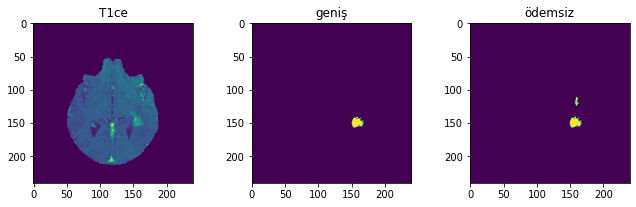

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(3,4,1)
plt.title('T1ce')
plt.imshow(t1ce[425,0,:,:])

plt.subplot(3,4,2)
plt.title('geniş')
plt.imshow(seg_geniş[425,0,:,:])

plt.subplot(3,4,3)
plt.title('ödemsiz')
plt.imshow(seg_ödemsiz[425,0,:,:])

In [ ]:
def tümör_kırpma(mr,seg):
    
    mr = mr[0]
    liste = []
    tmp = seg[0,:,:]
    tmp[tmp>0.2] = 1
    tmp[tmp!= 1] = 0
    index_xy = np.where(tmp==1)
    
    if index_xy[0] != []:
        merkez_y = (max(index_xy[0]) + (min(index_xy[0])) ) / 2
        merkez_x = (max(index_xy[1]) + (min(index_xy[1])) ) / 2
        img_x =  np.zeros((64,64), np.float32)
        img_x[:,:] = mr[int(merkez_y - 64/2):int(merkez_y + 64/2),int(merkez_x - 64/2):int(merkez_x + 64/2) ]
        liste.append(img_x)
        
    return np.array(liste)

def tumortoarray(tumor,segmentasyon):
    
    liste_boş= []

    for i in range(len(segmentasyon)):
        img = tümör_kırpma(tumor[i],segmentasyon[i])
        if len(img.shape) > 2:
            liste_boş.append(img)
            print(f'{i}')

    return np.array(liste_boş)

ödemsiz = tumortoarray(seg_ödemsiz,seg_ödemsiz)
geniş = tumortoarray(seg_geniş,seg_ödemsiz)
t1ce_kırp = tumortoarray(t1ce,seg_ödemsiz)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # Remove the CWD from sys.path while we load stuff.


92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
493
494
495
496
497
498
499
500
501
502
503
504
505
506
507
508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546


In [ ]:
t1ce_kırp.shape, ödemsiz.shape, geniş.shape

((1162, 1, 64, 64), (1162, 1, 64, 64), (1162, 1, 64, 64))

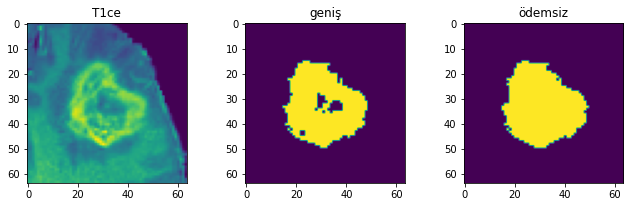

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(3,4,1)
plt.title('T1ce')
plt.imshow(t1ce_kırp[405,0,:,:])

plt.subplot(3,4,2)
plt.title('geniş')
plt.imshow(geniş[405,0,:,:])

plt.subplot(3,4,3)
plt.title('ödemsiz')
plt.imshow(ödemsiz[405,0,:,:])

In [ ]:
def unet_model_7():
    
    inputs = Input((1, 64, 64))
    conv1 = Conv2D(64, (3, 3), activation='relu', padding='same') (inputs)
    batch1 = BatchNormalization(axis=1)(conv1)
    conv1 = Conv2D(64, (3, 3), activation='relu', padding='same') (batch1)
    batch1 = BatchNormalization(axis=1)(conv1)
    pool1 = MaxPooling2D((2, 2)) (batch1)
    
    conv2 = Conv2D(128, (3, 3), activation='relu', padding='same') (pool1)
    batch2 = BatchNormalization(axis=1)(conv2)
    conv2 = Conv2D(128, (3, 3), activation='relu', padding='same') (batch2)
    batch2 = BatchNormalization(axis=1)(conv2)
    pool2 = MaxPooling2D((2, 2)) (batch2)
    
    conv3 = Conv2D(256, (3, 3), activation='relu', padding='same') (pool2)
    batch3 = BatchNormalization(axis=1)(conv3)
    conv3 = Conv2D(256, (3, 3), activation='relu', padding='same') (batch3)
    batch3 = BatchNormalization(axis=1)(conv3)
    pool3 = MaxPooling2D((2, 2)) (batch3)
     
    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same') (pool3)
    batch5 = BatchNormalization(axis=1)(conv5)
    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same') (batch5)
    batch5 = BatchNormalization(axis=1)(conv5)
    
    up7 = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same') (batch5)
    up7 = concatenate([up7, conv3], axis=1)
    conv7 = Conv2D(256, (3, 3), activation='relu', padding='same') (up7)
    batch7 = BatchNormalization(axis=1)(conv7)
    conv7 = Conv2D(256, (3, 3), activation='relu', padding='same') (batch7)
    batch7 = BatchNormalization(axis=1)(conv7)
    
    up8 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same') (batch7)
    up8 = concatenate([up8, conv2], axis=1)
    conv8 = Conv2D(128, (3, 3), activation='relu', padding='same') (up8)
    batch8 = BatchNormalization(axis=1)(conv8)
    conv8 = Conv2D(128, (3, 3), activation='relu', padding='same') (batch8)
    batch8 = BatchNormalization(axis=1)(conv8)
    
    up9 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (batch8)
    up9 = concatenate([up9, conv1], axis=1)
    conv9 = Conv2D(64, (3, 3), activation='relu', padding='same') (up9)
    batch9 = BatchNormalization(axis=1)(conv9)
    conv9 = Conv2D(64, (3, 3), activation='relu', padding='same') (batch9)
    batch9 = BatchNormalization(axis=1)(conv9)

    conv10 = Conv2D(1, (1, 1), activation='sigmoid')(batch9)

    model = Model(inputs=[inputs], outputs=[conv10])

    model.compile(optimizer=Adam(lr=1e-4), loss=dice_coef_loss, metrics=[dice_coef])

    return model

In [ ]:
model_ödemsiz = unet_model_7()

In [ ]:
history = model_ödemsiz.fit(t1ce_kırp, ödemsiz,
                       validation_split= 0.20,
                       batch_size = 10,
                       epochs= 5,
                       shuffle=True,
                       verbose=1)

Epoch 1/5
93/93 [==============================] - 7s 51ms/step - loss: 0.4668 - dice_coef: 0.5332 - val_loss: 0.7716 - val_dice_coef: 0.2225
Epoch 2/5
93/93 [==============================] - 3s 37ms/step - loss: 0.1983 - dice_coef: 0.8017 - val_loss: 0.6526 - val_dice_coef: 0.3377
Epoch 3/5
93/93 [==============================] - 3s 37ms/step - loss: 0.1483 - dice_coef: 0.8517 - val_loss: 0.3434 - val_dice_coef: 0.6539
Epoch 4/5
93/93 [==============================] - 3s 37ms/step - loss: 0.1406 - dice_coef: 0.8594 - val_loss: 0.3076 - val_dice_coef: 0.6910
Epoch 5/5
93/93 [==============================] - 3s 37ms/step - loss: 0.0879 - dice_coef: 0.9121 - val_loss: 0.3189 - val_dice_coef: 0.6668


In [ ]:
model_geniş = unet_model_7()

In [ ]:
history = model_geniş.fit(t1ce_kırp, geniş,
                       validation_split= 0.20,
                       batch_size = 10,
                       epochs= 5,
                       shuffle=True,
                       verbose=1)

Epoch 1/5
93/93 [==============================] - 5s 41ms/step - loss: 0.6033 - dice_coef: 0.3967 - val_loss: 0.7579 - val_dice_coef: 0.2359
Epoch 2/5
93/93 [==============================] - 3s 37ms/step - loss: 0.3424 - dice_coef: 0.6576 - val_loss: 0.6794 - val_dice_coef: 0.3117
Epoch 3/5
93/93 [==============================] - 3s 38ms/step - loss: 0.3120 - dice_coef: 0.6880 - val_loss: 0.4440 - val_dice_coef: 0.5400
Epoch 4/5
93/93 [==============================] - 3s 37ms/step - loss: 0.2613 - dice_coef: 0.7387 - val_loss: 0.3601 - val_dice_coef: 0.6332
Epoch 5/5
93/93 [==============================] - 3s 37ms/step - loss: 0.2283 - dice_coef: 0.7717 - val_loss: 0.2184 - val_dice_coef: 0.7743


In [ ]:
model_ödemsiz.load_weights('/content/drive/MyDrive/ödemsiz.h5')
model_geniş.load_weights('/content/drive/MyDrive/geniş.h5')
#model_ödemsiz.load_weights('/content/ödemsiz.h5')
#model_geniş.load_weights('/content/geniş.h5')

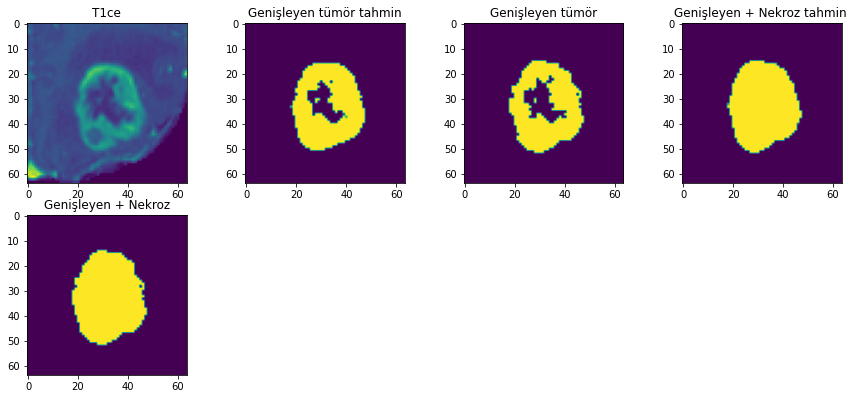

In [ ]:
x = 235

plt.figure(figsize=(15,10))

plt.subplot(3,4,1)
plt.title('T1ce')
plt.imshow(t1ce_kırp[x,0,:,:])


pred_geniş = model_geniş.predict(t1ce_kırp[x:x+1,:,:,:])
plt.subplot(3,4,2)
plt.title('Genişleyen tümör tahmin')
plt.imshow(pred_geniş[0,0,:,:] )

plt.subplot(3,4,3)
plt.title('Genişleyen tümör')
plt.imshow(geniş[x,0,:,:])

pred_ödemsiz = model_ödemsiz.predict(t1ce_kırp[x:x+1,:,:,:])
plt.subplot(3,4,4)
plt.title('Genişleyen + Nekroz tahmin ')
plt.imshow(pred_ödemsiz[0,0,:,:] )


plt.subplot(3,4,5)
plt.title('Genişleyen + Nekroz')
plt.imshow(ödemsiz[x,0,:,:])

In [ ]:
def tümör_kırp(x, pred, size): 
    crop_x = []
    list_xy = []
    p_tmp = pred[0,:,:]
    p_tmp[p_tmp>0.2] = 1    
    p_tmp[p_tmp !=1] = 0
    index_xy = np.where(p_tmp==1)  

    if index_xy[0].shape[0] == 0: 
        return [],[]
        
    center_x = (max(index_xy[0]) + min(index_xy[0])) / 2 
    center_y = (max(index_xy[1]) + min(index_xy[1])) / 2 
    
    if center_x >= 176:
            center_x = center_x-8
        
    length = max(index_xy[0]) - min(index_xy[0])
    width = max(index_xy[1]) - min(index_xy[1])
        
    if width <= 64 and length <= 64:  #64x64
        img_x = np.zeros((1,size,size),np.float32)
        img_x[:,:,:] = x[:,int(center_x - size/2) : int(center_x + size/2),int(center_y - size/2) : int(center_y + size/2)]
        crop_x.append(img_x)
        list_xy.append((int(center_x - size/2),int(center_y - size/2)))
            
    if width > 64 and length <= 64:  #64x128
        img_x = np.zeros((1,size,size),np.float32)
        img_x[:,:,:] = x[:,int(center_x - size/2) : int(center_x + size/2),int(center_y - size) : int(center_y)]
        crop_x.append(img_x)
        list_xy.append((int(center_x - size/2),int(center_y - size)))
            
        img_x = np.zeros((1,size,size),np.float32)
        img_x[:,:,:] = x[:,int(center_x - size/2) : int(center_x + size/2),int(center_y + 1) : int(center_y + size + 1)]
        crop_x.append(img_x)
        list_xy.append((int(center_x - size/2),int(center_y)))
            
    if width <= 64 and length > 64:  #128x64       
        img_x = np.zeros((1,size,size),np.float32)
        img_x[:,:,:] = x[:,int(center_x - size) : int(center_x),int(center_y - size/2) : int(center_y + size/2)]
        crop_x.append(img_x)
        list_xy.append((int(center_x - size),int(center_y - size/2)))
            
        img_x = np.zeros((1,size,size),np.float32)
        img_x[:,:,:] = x[:,int(center_x + 1) : int(center_x + size + 1),int(center_y - size/2) : int(center_y + size/2)]
        crop_x.append(img_x)
        list_xy.append((int(center_x),int(center_y - size/2)))
            
    if width > 64 and length > 64:  #128x128
        img_x = np.zeros((1,size,size),np.float32)
        img_x[:,:,:] = x[:,int(center_x - size) : int(center_x),int(center_y - size) : int(center_y)]
        crop_x.append(img_x)
        list_xy.append((int(center_x - size),int(center_y - size)))
            
        img_x = np.zeros((1,size,size),np.float32)
        img_x[:,:,:] = x[:,int(center_x + 1) : int(center_x + size + 1),int(center_y - size) : int(center_y)]
        crop_x.append(img_x)
        list_xy.append((int(center_x),int(center_y - size)))
            
        img_x = np.zeros((1,size,size),np.float32)
        img_x[:,:,:] = x[:,int(center_x - size) : int(center_x),int(center_y + 1) : int(center_y + size + 1)]
        crop_x.append(img_x)
        list_xy.append((int(center_x - size),int(center_y)))
            
        img_x = np.zeros((1,size,size),np.float32)
        img_x[:,:,:] = x[:,int(center_x + 1) : int(center_x + size + 1),int(center_y + 1) : int(center_y + size + 1)]
        crop_x.append(img_x)
        list_xy.append((int(center_x),int(center_y)))
        
    
        
    return np.array(crop_x) , list_xy   

In [ ]:
sayı = 210

görüntü1, kordinat1 = tümör_kırp(t1ce[sayı,:,:,:],seg[sayı,:,:,:],64)
görüntü2, kordinat2 = tümör_kırp(seg_geniş[sayı,:,:,:],seg[sayı,:,:,:],64)
görüntü3, kordinat3 = tümör_kırp(seg_ödemsiz[sayı,:,:,:],seg[sayı,:,:,:],64)

In [ ]:
görüntü1.shape, görüntü2.shape, görüntü3.shape

((4, 1, 64, 64), (4, 1, 64, 64), (4, 1, 64, 64))

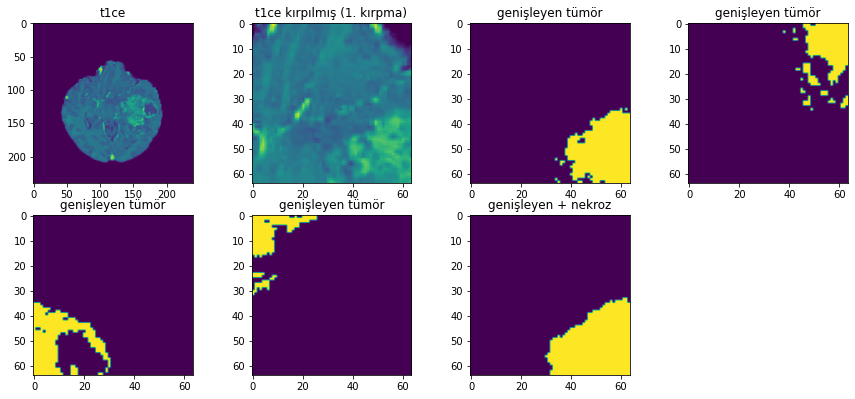

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(3,4,1)
plt.title('t1ce')
plt.imshow(t1ce[sayı,0,:,:])

plt.subplot(3,4,2)
plt.title('t1ce kırpılmış (1. kırpma)')
plt.imshow(görüntü1[0,0,:,:])

plt.subplot(3,4,3)
plt.title('genişleyen tümör')
plt.imshow(görüntü2[0,0,:,:])

plt.subplot(3,4,4)
plt.title('genişleyen tümör')
plt.imshow(görüntü2[1,0,:,:])

plt.subplot(3,4,5)
plt.title('genişleyen tümör')
plt.imshow(görüntü2[2,0,:,:])

plt.subplot(3,4,6)
plt.title('genişleyen tümör')
plt.imshow(görüntü2[3,0,:,:])

plt.subplot(3,4,7)
plt.title('genişleyen + nekroz')
plt.imshow(görüntü3[0,0,:,:])

In [ ]:
def tumor2array(tumor,segmentasyon):

    liste = []

    for i in range(len(tumor)):
        crop , kordinat = tümör_kırp(tumor[i,:,:,:],segmentasyon[i,:,:,:],64)
    
        if crop == []:
            pass
        elif crop.shape[0] ==1:
            liste.append(crop[0])
        
        elif crop.shape[0] ==2:
        
           liste.append(crop[0])
           liste.append(crop[1])
        
        elif crop.shape[0] ==4:
        
            liste.append(crop[0])
            liste.append(crop[1])
            liste.append(crop[2])
            liste.append(crop[3]) 
    
    return np.array(liste)

In [ ]:
t1ce_array = tumor2array(t1ce,seg)
geniş_array = tumor2array(seg_geniş,seg)
ödemsiz_array = tumor2array(seg_ödemsiz,seg)
t1ce_array.shape, ödemsiz_array.shape, geniş_array.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  


((2973, 1, 64, 64), (2973, 1, 64, 64), (2973, 1, 64, 64))

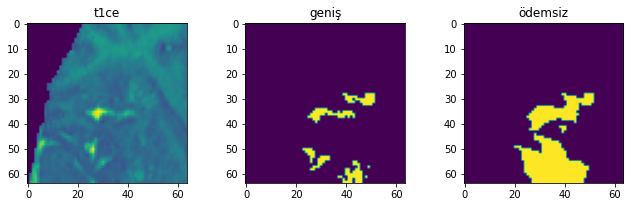

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(3,4,1)
plt.title('t1ce')
plt.imshow(t1ce_array[90,0,:,:])

plt.subplot(3,4,2)
plt.title('geniş')
plt.imshow(geniş_array[90,0,:,:])

plt.subplot(3,4,3)
plt.title('ödemsiz')
plt.imshow(ödemsiz_array[90,0,:,:])

In [ ]:
model_ödemsiz_2 = unet_model_7()

In [ ]:
history = model_ödemsiz_2.fit(t1ce_array, ödemsiz_array,
                       validation_split= 0.20,
                       batch_size = 10,
                       epochs= 5,
                       shuffle=True,
                       verbose=1)

Epoch 1/5
238/238 [==============================] - 11s 41ms/step - loss: 0.6418 - dice_coef: 0.3582 - val_loss: 0.7614 - val_dice_coef: 0.2366
Epoch 2/5
238/238 [==============================] - 9s 36ms/step - loss: 0.3577 - dice_coef: 0.6423 - val_loss: 0.5925 - val_dice_coef: 0.4041
Epoch 3/5
238/238 [==============================] - 9s 36ms/step - loss: 0.2351 - dice_coef: 0.7649 - val_loss: 0.5621 - val_dice_coef: 0.4342
Epoch 4/5
238/238 [==============================] - 9s 37ms/step - loss: 0.1843 - dice_coef: 0.8157 - val_loss: 0.5415 - val_dice_coef: 0.4547
Epoch 5/5
238/238 [==============================] - 9s 37ms/step - loss: 0.1274 - dice_coef: 0.8726 - val_loss: 0.5189 - val_dice_coef: 0.4771


In [ ]:
model_geniş_2 = unet_model_7()

In [ ]:
history = model_geniş_2.fit(t1ce_array, geniş_array,
                       validation_split= 0.20,
                       batch_size = 10,
                       epochs= 5,
                       shuffle=True,
                       verbose=1)

Epoch 1/5
238/238 [==============================] - 11s 38ms/step - loss: 0.7617 - dice_coef: 0.2383 - val_loss: 0.7843 - val_dice_coef: 0.2139
Epoch 2/5
238/238 [==============================] - 9s 37ms/step - loss: 0.5475 - dice_coef: 0.4525 - val_loss: 0.5444 - val_dice_coef: 0.4518
Epoch 3/5
238/238 [==============================] - 9s 37ms/step - loss: 0.4353 - dice_coef: 0.5647 - val_loss: 0.4494 - val_dice_coef: 0.5460
Epoch 4/5
238/238 [==============================] - 9s 37ms/step - loss: 0.3477 - dice_coef: 0.6523 - val_loss: 0.5243 - val_dice_coef: 0.4718
Epoch 5/5
238/238 [==============================] - 9s 38ms/step - loss: 0.2797 - dice_coef: 0.7203 - val_loss: 0.4323 - val_dice_coef: 0.5630


In [ ]:
model_ödemsiz_2.load_weights('/content/drive/MyDrive/ödemsiz.h5')
model_geniş_2.load_weights('/content/drive/MyDrive/geniş.h5')
model.load_weights('/content/drive/MyDrive/tam.h5')
# model_ödemsiz_2.load_weights('/content/ödemsiz.h5')
# model_geniş_2.load_weights('/content/geniş.h5')
# model.load_weights('/content/tam.h5')

In [ ]:
görüntü , koordinat = tümör_kırp(t1ce[1020,:,:,:],seg[1020,:,:,:],64)

In [ ]:
görüntü.shape

(4, 1, 64, 64)

In [ ]:
pred_ödemsiz = model_ödemsiz.predict(görüntü)
pred_geniş = model_geniş.predict(görüntü)
pred_tam = model.predict(x_train[1020:1021,:,:,:])

In [ ]:
pred_tam[pred_tam > 0.2] = 2
pred_tam[pred_tam != 2 ] = 0

pred_ödemsiz[pred_ödemsiz > 0.2] = 1
pred_ödemsiz[pred_ödemsiz != 1 ] = 0

pred_geniş[pred_geniş > 0.2] = 4
pred_geniş[pred_geniş != 4 ] = 0

In [ ]:
def üstüne_ekle(pred_tam, pred_ödemsiz , pred_geniş , koordinat):  
    
    total = np.zeros((1,240,240),np.float32)  
    total[:,:,:] = pred_tam[:,:,:]
    
    for i in range(pred_ödemsiz.shape[0]):
        for j in range(64):
            for k in range(64):
                
                if pred_ödemsiz[i,0,j,k] != 0 and pred_tam[0,koordinat[i][0]+j,koordinat[i][1]+k] !=0:
                    total[0,koordinat[i][0]+j,koordinat[i][1]+k] = pred_ödemsiz[i,0,j,k]
                    
                if pred_geniş[i,0,j,k] != 0 and pred_tam[0,koordinat[i][0]+j,koordinat[i][1]+k] !=0:
                    total[0,koordinat[i][0]+j,koordinat[i][1]+k] = pred_geniş[i,0,j,k]
                
    return total

In [ ]:
deneme = üstüne_ekle(pred_tam[0,:,:,:], pred_ödemsiz, pred_geniş, koordinat)

In [ ]:
deneme.shape

(1, 240, 240)

**Tahmin (Prediction)**

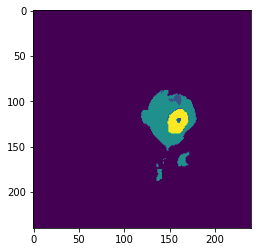

In [ ]:
plt.imshow(deneme[0])

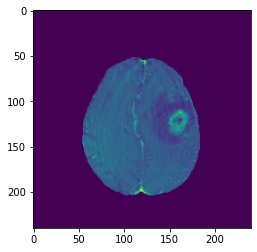

In [ ]:
plt.imshow(t1ce[1020,0,:,:])

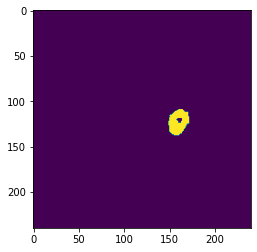

In [ ]:
plt.imshow(seg_geniş[1020,0,:,:])

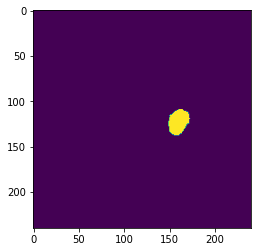

In [ ]:
plt.imshow(seg_ödemsiz[1020,0,:,:])